Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Bishal Khanal"
ID = "st122221"

---

# Lab 08: Deep Learning Part I: Fully Connected Neural Networks

In class, we have developed the mathematics and programming techniques for binary classification using fully connected neural networks having one or more hidden layers.

Today, we'll see how to implement backpropagation in
hand-coded neural networks and also expand on that to consider
(small) image classification using again fully connected neural networks but now with a multinomial
(softmax) output layer.

In [2]:
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension


## What is Deep learning doing?

Let's try to understand what's happening in a deep learning model
using the [TensorFlow playground](https://playground.tensorflow.org/).
The playground is a Web application that lets you visualize a network
as it's being optimized.

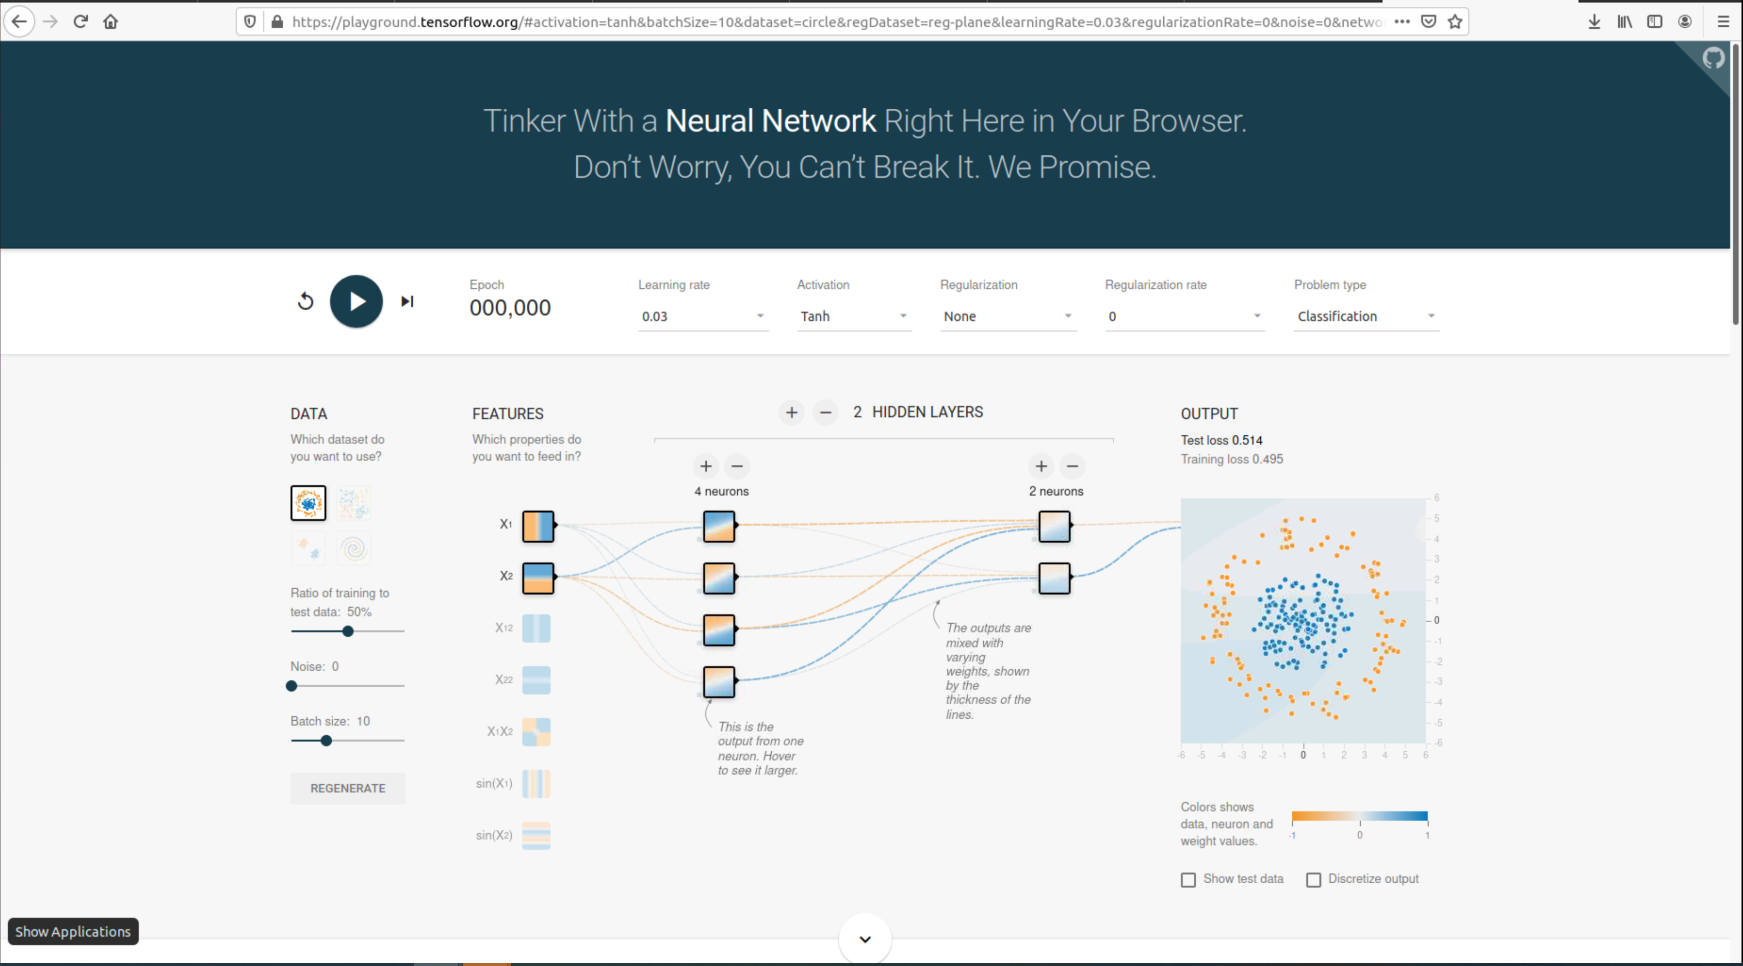

Set up a model with parameters (at the left) as:
- Ratio of training to test data: 90%
- Noise: 5
- Batch size: 4

Press "run" and observe the result. You can play around with the model.


## Exercise 1 (10 points)

In the Playground, select the spiral shape for the data
(the 4th shape). Set up parameters as follows.
- Ratio of training to test data: 90%
- Noise: 35
- Batch size: 4

Try to find a structure and parameters to find the best separation
between positive and negative cases. Capture a full screen result and input it in the next cell.

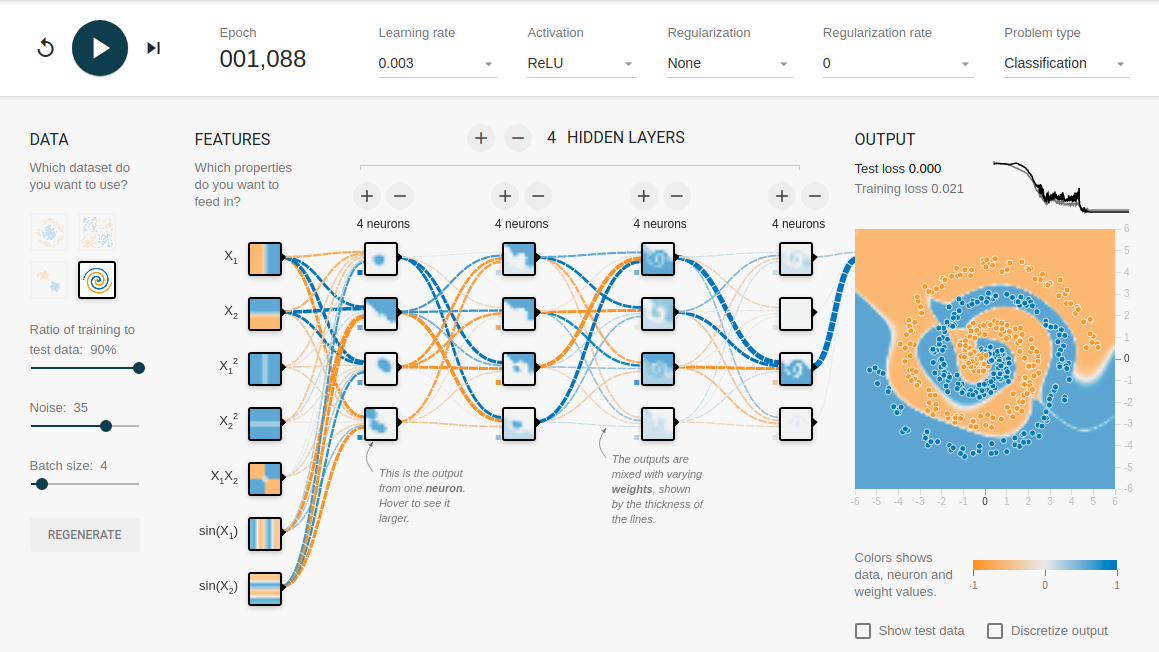

**Expected result**:

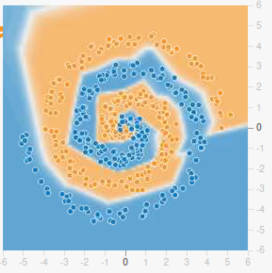

Let's make a GUI in Jupyter next (you GUI can also export to a HTML website).
Fix the settings to reflect what you did on the Playground.

In [3]:
# YOUR CODE HERE
# raise NotImplementedError()
from IPython.display import display, Markdown, clear_output

# Use the widget package
import ipywidgets as widgets

# Define some widgets
lblQ1 = widgets.Label(
        value="Q1) What is your learning rate?")
rdoQ1 = widgets.RadioButtons(
        options=['0.00001', '0.0001', '0.001', '0.003', '0.01', '0.03', '0.1', '0.3', '1', '3', '10',],
        value='0.003',
        description='\t',
        disabled=False)

lblQ2 = widgets.Label(
        value="Q2) What is your activation function in last layer?")
rdoQ2 = widgets.RadioButtons(
        options=['ReLu', 'Tanh', 'Sigmoid', 'Linear',],
        value='ReLu',
        description='\t',
        disabled=False)

lblQ3 = widgets.Label(
        value="Q3) What is problem type?")
rdoQ3 = widgets.RadioButtons(
        options=['Classification', 'Regression'],
        value='Classification',
        description='\t',
        disabled=False)

lblQ4 = widgets.Label(value="Q4) Which input do you use?")
chkQ4_1 = widgets.Checkbox(
           description='$X_1$',
           value=True)
chkQ4_2 = widgets.Checkbox(
           description='$X_2$',
           value=True)
chkQ4_3 = widgets.Checkbox(
           description='$X_1^2$',
            value=True)
chkQ4_4 = widgets.Checkbox(
           description='$X_1X_2$',
            value=True)
chkQ4_5 = widgets.Checkbox(
           description='$X_2^2$',
            value=True)
chkQ4_6 = widgets.Checkbox(
           description='sin$(X_1)$',
            value=True)
chkQ4_7 = widgets.Checkbox(
           description='sin$(X_2)$',
            value=True)
chkQ4 = widgets.VBox([chkQ4_1, chkQ4_2, chkQ4_3, chkQ4_4, chkQ4_5, chkQ4_6, chkQ4_7])

lblQ5 = widgets.Label(value="Q5) How many hidden layers do you use?")
txtQ5 = widgets.IntText(
       value=4,
       description='hidden layers', )

lblQ6 = widgets.Label(value="Q6) Explain your nodes for each layer")
txtQ6 = widgets.Textarea(
       value='Activations of Nodes of first hidden layer is simple blobs. Activation of Nodes of second hidden layer is also simple blobs but with simple single turbulence, The activation of Nodes on third and forth hidden layer has more complex spiral turbulence trying to separate the two classes.',
       description='Explain here', )

box = widgets.VBox([lblQ1, rdoQ1, lblQ2, rdoQ2, lblQ3, rdoQ3, lblQ4, chkQ4, lblQ5, txtQ5, lblQ6, txtQ6,])

box

In [4]:
q4str = ""
if chkQ4_1.value:
    q4str += " X1,"
if chkQ4_2.value:
    q4str += " X2,"
if chkQ4_3.value:
    q4str += " X1^2,"
if chkQ4_4.value:
    q4str += " X1X2,"
if chkQ4_5.value:
    q4str += " X2^2,"
if chkQ4_6.value:
    q4str += " sin(X1),"
if chkQ4_7.value:
    q4str += " sin(X2),"
print("Use input features:", q4str)
print("Problem type:", rdoQ3.value)
print("The last activation function:", rdoQ2.value)
print("Learning rate:", rdoQ1.value)
print("Use", txtQ5.value, "hidden layers. Each layer contains", txtQ6.value)

Use input features:  X1, X2, X1^2, X1X2, X2^2, sin(X1), sin(X2),
Problem type: Classification
The last activation function: ReLu
Learning rate: 0.003
Use 4 hidden layers. Each layer contains Activations of Nodes of first hidden layer is simple blobs. Activation of Nodes of second hidden layer is also simple blobs but with simple single turbulence, The activation of Nodes on third and forth hidden layer has more complex spiral turbulence trying to separate the two classes.


## MNIST data set

An image is a 2D array of pixels. Pixels can be scalar intensities (for a grayscale / black and white image) or
a vector indicating a point in a color space such as RGB or HSV.

Today we'll consider 8$\times$8 grayscale images of digits from the famous "MNIST" dataset, which was considered
a benchmark for machine learning algorithms up to the early 2000s, before the advent of large-scale image
classification datasets.

MNIST is part of the SciKit-Learn module and has 10 classes,
with 180 samples per class in most cases, for a total of 1797 samples.

Let's load the dataset and plot an example.

Text(0.5, 1.0, 'Example MNIST sample (category 0)')

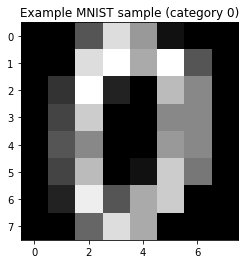

In [5]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load data

data = load_digits()

def convert_to_one_hot(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, int(y[i])] = 1
    return y_vect

# Convert target indices to one-hot representation

y_indices = data.target
y = convert_to_one_hot(y_indices)
X = np.matrix(data.data)
M = X.shape[0]
N = X.shape[1]

# Plot an example

plt.imshow(np.reshape(X[0,:],(8,8)), 'gray')
plt.title('Example MNIST sample (category %d)' % y_indices[0])

## Hand-Coded Fully Connected Neural Network

OK, now let's develop some code based on the mathematics we developed in
class to work with this dataset and run 100 epochs of training.
The main change is to use a one-hot encoding of the 10 classes at the output layer and to use
the softmax activation function at the output. Some minor changes are required to calculate multinomial
cross entropy loss rather than binary cross entropy loss.

First, some imports.

In [6]:
import random
import warnings
warnings.filterwarnings("ignore")

random.seed(32)
np.random.seed(32)

Next, let's normalize the input features using z-scaling (subtracting the mean of each input then dividing by
its standard deviation).

In [7]:
def normalize(X):
    M = X.shape[0]
    XX = X - np.tile(np.mean(X,0),[M,1])
    XX = np.divide(XX, np.tile(np.std(XX,0),[M,1]))
    return np.nan_to_num(XX, copy=True,nan=0.0)

XX = normalize(X)

Note that some researchers that do deep learning with
images use the word "normalization" to specifically indicate dividing
pixel intensities by 255 in order to scale them to the range 0..1. We use the more general
sense of the word "normalize," and we use the specific normalization technique of z-scaling.

Next we'll partition the data into separate training and test datasets.

In [8]:
idx = np.arange(0,M)

random.shuffle(idx)
percent_train = .6
m_train = int(M * percent_train)
train_idx = idx[:m_train]
test_idx = idx[m_train:]
X_train = XX[train_idx,:];
X_test = XX[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];
y_test_indices = y_indices[test_idx]

Next, let's define a 3-layer network with sigmoid activation functions,
6 units in layer 1, and 5 units in layer 2.

In [9]:
h2 = 5
h1 = 6
W = [[], np.random.normal(0, 0.1, [N, h1]),
         np.random.normal(0, 0.1, [h1, h2]),
         np.random.normal(0, 0.1, [h2, 10])]
b = [[], np.random.normal(0, 0.1, [h1, 1]),
         np.random.normal(0, 0.1, [h2, 1]),
         np.random.normal(0, 0.1, [10, 1])]
L = len(W) - 1

Next, let's create some important functions used later.

In [10]:
def sigmoid_act(z):
    return 1 / (1 + np.exp(-z))

def softmax_act(z):
    exps = np.exp(z)
    return exps / np.sum(exps)

def sigmoid_actder(z):
    az = sigmoid_act(z)
    prod = np.multiply(az, 1 - az)
    return prod

def ff(x, W, b):
    L = len(W)-1
    a = x
    for l in range(1, L + 1):
        z = W[l].T * a + b[l]
        if (l == L):
            a = softmax_act(z)
        else:
            a = sigmoid_act(z)
    return a

def loss(y, yhat):
    return - np.dot(y, np.log(yhat))

def forward(x_this, W, b):
    L = len(W) - 1
    a = [x_this]
    z = [[]]
    delta = [[]]
    dW = [[]]
    db = [[]]
    for l in range(1, L + 1):
        z.append(W[l].T * a[l-1] + b[l])
        if (l == L):
            a.append(softmax_act(z[l]))
        else:
            a.append(sigmoid_act(z[l]))
        # Just to give arrays the right shape for the backprop step
        delta.append([]); dW.append([]); db.append([])
    return a, z, delta, dW, db

def back_propagation(y_this, a, z, W, delta, dW, db, show_check=False):
    '''
    Backprop step. Note that derivative of multinomial cross entropy
    loss is the same as that of binary cross entropy loss. See
    https://levelup.gitconnected.com/killer-combo-softmax-and-cross-entropy-5907442f60ba
    for a nice derivation.
    '''
    L = len(W) - 1
    delta[L] = a[L] - np.matrix(y_this).T
    for l in range(L, 0, -1):
        db[l] = delta[l].copy()
        dW[l] = a[l-1] * delta[l].T
        if l > 1:
            delta[l-1] = np.multiply(sigmoid_actder(z[l-1]), W[l] * delta[l])

    # Check delta calculation

    if show_check:
        print('Target: %f' % y_this)
        print('y_hat: %f' % a[L][0, 0])
        print(db)
        y_pred = ff(x_this,W,b)
        diff = 1e-3
        W[1][10, 0] = W[1][10, 0] + diff
        y_pred_db = ff(x_this,W,b)
        L1 = loss(y_this, y_pred)
        L2 = loss(y_this, y_pred_db)
        db_finite_difference = (L2 - L1) / diff
        print('Original out %f, perturbed out %f' %
             (y_pred[0, 0], y_pred_db[0, 0]))
        print('Theoretical dW %f, calculated db %f' %
              (dW[1][10, 0], db_finite_difference[0, 0]))
    return dW, db

def update_step(W, b, dW, db, alpha):
    L = len(W) - 1
    for l in range(1, L + 1):            
        W[l] = W[l] - alpha * dW[l]
        b[l] = b[l] - alpha * db[l]
    return W, b

Now, let's train for 100 epochs with a mini-batch size of 1.

In [11]:
cost_arr = [] 

alpha = 0.01
max_iter = 100
for iter in range(0, max_iter):
    loss_this_iter = 0
    order = np.random.permutation(m_train)
    for i in range(0, m_train):
        
        # Grab the pattern order[i]
        
        x_this = X_train[order[i],:].T
        y_this = y_train[order[i],:]

        # Feed forward step
        a, z, delta, dW, db = forward(x_this, W, b)
            
        # calulate loss
        loss_this_pattern = loss(y_this, a[L])
        loss_this_iter = loss_this_iter + loss_this_pattern
        
        # back propagation
        dW, db = back_propagation(y_this, a, z, W, delta, dW, db, show_check=False)
        
        # update weight, bias
        W, b = update_step(W, b, dW, db, alpha)
            
    cost_arr.append(loss_this_iter[0,0])
    print('Epoch %d train loss %f' % (iter, loss_this_iter))

Epoch 0 train loss 2488.616594
Epoch 1 train loss 2488.222960
Epoch 2 train loss 2487.181424
Epoch 3 train loss 2485.320074
Epoch 4 train loss 2481.863321
Epoch 5 train loss 2477.679000
Epoch 6 train loss 2467.004258
Epoch 7 train loss 2446.904646
Epoch 8 train loss 2409.922688
Epoch 9 train loss 2346.891163
Epoch 10 train loss 2250.514332
Epoch 11 train loss 2139.531451
Epoch 12 train loss 2046.142525
Epoch 13 train loss 1988.263919
Epoch 14 train loss 1949.474427
Epoch 15 train loss 1922.433104
Epoch 16 train loss 1903.018478
Epoch 17 train loss 1884.997593
Epoch 18 train loss 1870.232370
Epoch 19 train loss 1853.798127
Epoch 20 train loss 1833.984468
Epoch 21 train loss 1811.132314
Epoch 22 train loss 1780.751697
Epoch 23 train loss 1741.544354
Epoch 24 train loss 1691.449259
Epoch 25 train loss 1635.757465
Epoch 26 train loss 1573.558866
Epoch 27 train loss 1513.469198
Epoch 28 train loss 1451.959591
Epoch 29 train loss 1396.149205
Epoch 30 train loss 1341.159774
Epoch 31 train los

Let's plot the loss over time per epoch.

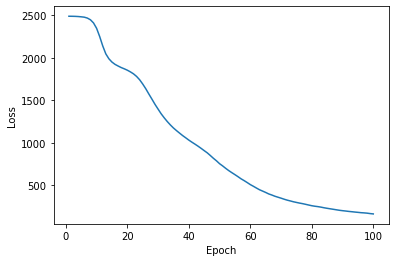

In [12]:
plt.plot(np.arange(1, max_iter + 1, 1), cost_arr)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Let's get the test set accuracy.

In [13]:
def predict_y(W, b, X):
    M = X.shape[0]
    y_pred = np.zeros(M)
    for i in range(X.shape[0]):
        y_pred[i] = np.argmax(ff(X[i, :].T, W, b))
    return y_pred

y_test_predicted = predict_y(W, b, X_test)
y_correct = y_test_predicted == y_test_indices
test_accuracy = np.sum(y_correct) / len(y_correct)

print('Test accuracy: %.4f' % (test_accuracy))

Test accuracy: 0.8790


## In-class exercise (40 points)

Modify the code above to plot both training loss and test loss as a function of epoch number.
Use early stopping to obtain the best model according to the validation set.
Experiment with the hyperparameters (learning rate, number of layers, number of units per layer) to get
the best result you can. In the cell below,
- Train with at least three different hyperparameter sets.
- Plot loss curves for the training and test sets on the same graph, with a legend showing the different
  hyperparameter settings.
- For each set of parameters, give the best validation accuracy.
- Describe your experiments and results below the code.

In [14]:
def build_net(num_layers, num_units_per_layer):
    W = [[], ]
    b = [[], ]
    for i in range(1, num_layers+1):
        W.append(np.random.normal(0, 0.5, [num_units_per_layer[i-1], num_units_per_layer[i]]))
        b.append(np.random.normal(0, 0.5, [num_units_per_layer[i], 1]))
    return W, b

In [15]:
# #This is for single hyperparameter sets
# #Skip this part for now    

# #Number of units in each hidden layer
# h2 = 5
# h1 = 6

# #initialization
# # W = [[], np.random.normal(0, 0.1, [N, h1]),
# #          np.random.normal(0, 0.1, [h1, h2]),
# #          np.random.normal(0, 0.1, [h2, 10])]
# # b = [[], np.random.normal(0, 0.1, [h1, 1]),
# #          np.random.normal(0, 0.1, [h2, 1]),
# #          np.random.normal(0, 0.1, [10, 1])]
# W, b = build_net(3, [N, 6, 5, 10])

# #best weights and biases based upon the validation accuracy
# W_best = W.copy()
# b_best = b.copy()

# L = len(W) - 1

# #cost accumulation
# train_cost_arr = []
# test_cost_arr = []

# #learning rate
# alpha = 0.01

# #no. of epoch
# max_iter = 100

# #training
# for iter in range(0, max_iter):
#     loss_this_iter = 0
#     order = np.random.permutation(m_train)
#     for i in range(0, m_train):
        
#         # Grab the pattern order[i]
        
#         x_this = X_train[order[i],:].T
#         y_this = y_train[order[i],:]

#         # Feed forward step
#         a, z, delta, dW, db = forward(x_this, W, b)
            
#         # calulate training loss
#         loss_this_pattern = loss(y_this, a[L])
#         loss_this_iter = loss_this_iter + loss_this_pattern
        
#         # back propagation
#         dW, db = back_propagation(y_this, a, z, W, delta, dW, db, show_check=False)
        
#         # update weight, bias
#         W, b = update_step(W, b, dW, db, alpha)
            
#     train_cost_arr.append(loss_this_iter[0,0])
#     #caculate test loss
#     test_loss_sum = 0
#     for i in range(X_test.shape[0]):
#         y_pred = ff(X_test[i, :].T, W, b)
#         test_loss = loss(y_test[i], y_pred)
#         test_loss_sum = test_loss_sum + test_loss
#     test_cost_arr.append(test_loss_sum[0,0])
    
#     if iter>0:
#         if test_loss_sum[0,0]<test_cost_arr[iter-1]:
#             W_best = W.copy()
#             b_best = b.copy()
    
#     print(f'Epoch {iter} train loss {loss_this_iter[0,0]}; Test loss: {test_loss_sum[0,0]}')

In [16]:
# YOUR CODE HERE
# Train with at least three different hyperparameter sets.

#sets of hyperparameter
#(num_layers, h, alpha)
F = y_train.shape[1] #number of units in final layer
N = X_train.shape[1] #number of units in input layer or input features size

sets = {'set1': {'num_layers': 3, 'num_units_per_layer': [N, 30, 20, F], 'alpha':0.01},
        'set2': {'num_layers': 4, 'num_units_per_layer': [N, 25, 20, 5, F], 'alpha':0.05},
        'set3': {'num_layers': 5, 'num_units_per_layer': [N, 20, 20, 5, 5, F], 'alpha':0.07}
       }


for key, value in sets.items():
    W, b = build_net(value['num_layers'], value['num_units_per_layer'])
    L = len(W) - 1
    alpha = value['alpha']
    sets[key]['W_best'] = W.copy()
    sets[key]['b_best'] = b.copy()
    sets[key]['train_cost_arr'] = []
    sets[key]['test_cost_arr'] = []
    
    max_iter = 100
    stop_count = 0
    
    #training
    min_loss = np.inf
    for iter in range(0, max_iter):
        loss_this_iter = 0
        order = np.random.permutation(m_train)
        for i in range(0, m_train):

            # Grab the pattern order[i]

            x_this = X_train[order[i],:].T
            y_this = y_train[order[i],:]

            # Feed forward step
            a, z, delta, dW, db = forward(x_this, W, b)

            # calulate training loss
            loss_this_pattern = loss(y_this, a[L])
            loss_this_iter = loss_this_iter + loss_this_pattern

            # back propagation
            dW, db = back_propagation(y_this, a, z, W, delta, dW, db, show_check=False)

            # update weight, bias
            W, b = update_step(W, b, dW, db, alpha)

        sets[key]['train_cost_arr'].append(loss_this_iter[0,0])
        
        #caculate test loss
        test_loss_sum = 0
        for i in range(X_test.shape[0]):
            y_pred = ff(X_test[i, :].T, W, b)
            test_loss = loss(y_test[i], y_pred)
            test_loss_sum = test_loss_sum + test_loss
            
        sets[key]['test_cost_arr'].append(test_loss_sum[0,0])

        if min_loss>test_loss_sum[0,0]:
            sets[key]['W_best'] = W.copy()
            sets[key]['b_best'] = b.copy()
            min_loss = test_loss_sum[0,0]
            stop_count = 0

        print(f'{key}: Epoch {iter} train loss {loss_this_iter[0,0]}; Test loss: {test_loss_sum[0,0]}')
        
        #stops training if validation loss stops improving for 30 consecutive epochs
        stop_count += 1
        if stop_count>30:
            break
    
    sets[key]['min_val_loss'] = min_loss
    print('\n')


set1: Epoch 0 train loss 2231.863044772224; Test loss: 1285.2719259272073
set1: Epoch 1 train loss 1648.176622379698; Test loss: 990.2182809130784
set1: Epoch 2 train loss 1255.0627664574115; Test loss: 775.1512646670516
set1: Epoch 3 train loss 981.7632607929071; Test loss: 624.9222786629925
set1: Epoch 4 train loss 790.1827488996996; Test loss: 514.7299547892945
set1: Epoch 5 train loss 652.353729630034; Test loss: 442.7276038813656
set1: Epoch 6 train loss 546.4739973017727; Test loss: 383.4240759708445
set1: Epoch 7 train loss 468.4479613223022; Test loss: 343.1954244000639
set1: Epoch 8 train loss 405.81597312421894; Test loss: 304.5288189105422
set1: Epoch 9 train loss 354.91648309531297; Test loss: 274.7927463051919
set1: Epoch 10 train loss 314.1762397652622; Test loss: 255.78342842335343
set1: Epoch 11 train loss 281.3029000524714; Test loss: 239.26170834461195
set1: Epoch 12 train loss 253.7311348957637; Test loss: 221.47536004696568
set1: Epoch 13 train loss 229.595693402931

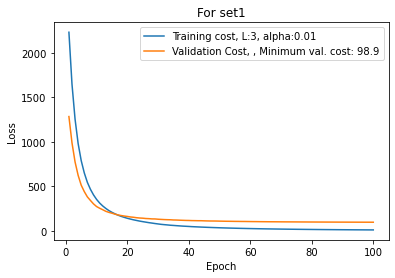

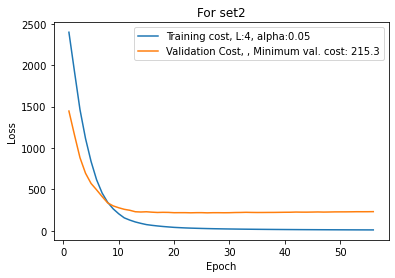

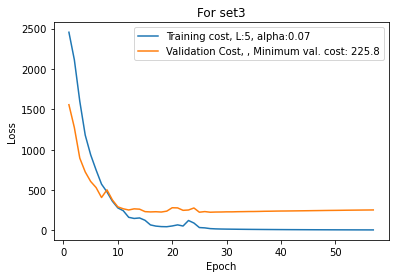

In [17]:
# Plot loss curves for the training and test sets on the same graph, 
# with a legend showing the different hyperparameter settings.

#plotting test error and training errors
plt.figure()
for key, value in sets.items():
    plt.plot(np.arange(1, len(value['train_cost_arr']) + 1, 1), value['train_cost_arr'], label = "Training cost, L:"+
             str(value['num_layers']) + ", alpha:"+str(value['alpha']))
    plt.plot(np.arange(1, len(value['test_cost_arr']) + 1, 1), value['test_cost_arr'], label = "Validation Cost, "+
             ", Minimum val. cost: "+str(np.round(value['min_val_loss'],1)))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('For '+key)
    plt.legend()
    plt.show()

In [18]:
# For each set of parameters, give the best validation accuracy.

for key, value in sets.items():
    y_test_predicted = predict_y(value["W_best"], value["b_best"], X_test)
    y_correct = y_test_predicted == y_test_indices
    test_accuracy = np.sum(y_correct) / len(y_correct)
    print(f'For {key}')
    print('Best validation accuracy: %.4f' % (test_accuracy))
    print('\n')

For set1
Best validation accuracy: 0.9569


For set2
Best validation accuracy: 0.9263


For set3
Best validation accuracy: 0.9360




### Discussions

Modify the code above to plot both training loss and test loss as a function of epoch number. Use early stopping to obtain the best model according to the validation set. Experiment with the hyperparameters (learning rate, number of layers, number of units per layer) to get the best result you can. In the cell below,

Train with at least three different hyperparameter sets.
Plot loss curves for the training and test sets on the same graph, with a legend showing the different hyperparameter settings.
For each set of parameters, give the best validation accuracy.
Describe your experiments and results below the code.

**Experiments**

I chose three different hyperparameters sets to experiment with the given datasets. These are the three sets.

- 'set1': {'num_layers': 3, 'num_units_per_layer': [N, 30, 20, F], 'alpha':0.01},
- 'set2': {'num_layers': 4, 'num_units_per_layer': [N, 25, 20, 5, F], 'alpha':0.05},
- 'set3': {'num_layers': 5, 'num_units_per_layer': [N, 20, 20, 5, 5, F], 'alpha':0.07

The alpha values are chosen based upon the model performance. I tried different values of alphas and these gave the better convergence of the model.

As you can see, I tried to set the total number of units for each different model to be the same. The equal number of total units in the model doesn't mean equal number of learning parameters. The total number of learning parameters of model for each sets of hyperparameters are:

- Nx30x20xF = 600xNxF
- Nx25x20x5xF = 2500xNxF
- Nx20x20x5x5xF = 10,000xNxF

The model with higher complexity didn't guarantee better accuracy than the model with lower complexity. The accuracy of the model is fluctuating at different run, this maybe because of the randomness we used to initialize parameters and on the training batch.

I stored the weights and biases of the model that got lowest validation error in all the epochs. Similarly, I stored the lowest validation error separately. This is for each sets of hyperparameters.

I used a stopper to stop the training process if the model's validation error didn't improve at 30 consecutive epochs.

The optimum weight parameters that your training loop results varies with the change in initial weights, since there is no single global minumum. There could be many local minimum and the initialization of the weights with different values may lead your model to reach different local minima or sometime luckily to global minima as well.

With the change in model architecture, the plot of the cost function over all the learning parameters varies. This results in different optimum weights for each model with similar initialization of weights.

Maybe in the next experiment I should try to set equal number of learning parameters for model with these sets of parameters. Then we can see the effect of organization of units over the layers.


**Results (at the time of report writing)**

I got this results when ran the code at that time. This output may vary because of the randomness of weight initializations at each run, and batch randomization.

- For set1: Number of layers-3, Hidden layers with number of units: 30, 20
    - Best validation accuracy: 0.9569
    
    

- For set2: Number of layers-4, Hidden layers with number of units: 25, 20, 5
    - Best validation accuracy: 0.9263
    
    

- For set3: Number of layers-5, Hidden layers with number of units: 20, 20, 5, 5
    - Best validation accuracy: 0.9305
    
    


### **Extra Experiment**

In [19]:
F = y_train.shape[1] #number of units in final layer
N = X_train.shape[1] #number of units in input layer or input features size

sets = {'set1': {'num_layers': 3, 'num_units_per_layer': [N, 30, 20, F], 'alpha':0.01},
        'set2': {'num_layers': 4, 'num_units_per_layer': [N, 10, 10, 6, F], 'alpha':0.04},
        'set3': {'num_layers': 5, 'num_units_per_layer': [N, 8, 6, 5, 5, F], 'alpha':0.07}
       }


for key, value in sets.items():
    W, b = build_net(value['num_layers'], value['num_units_per_layer'])
    L = len(W) - 1
    alpha = value['alpha']
    sets[key]['W_best'] = W.copy()
    sets[key]['b_best'] = b.copy()
    sets[key]['train_cost_arr'] = []
    sets[key]['test_cost_arr'] = []
    
    max_iter = 100
    stop_count = 0
    
    #training
    min_loss = np.inf
    for iter in range(0, max_iter):
        loss_this_iter = 0
        order = np.random.permutation(m_train)
        for i in range(0, m_train):

            # Grab the pattern order[i]

            x_this = X_train[order[i],:].T
            y_this = y_train[order[i],:]

            # Feed forward step
            a, z, delta, dW, db = forward(x_this, W, b)

            # calulate training loss
            loss_this_pattern = loss(y_this, a[L])
            loss_this_iter = loss_this_iter + loss_this_pattern

            # back propagation
            dW, db = back_propagation(y_this, a, z, W, delta, dW, db, show_check=False)

            # update weight, bias
            W, b = update_step(W, b, dW, db, alpha)

        sets[key]['train_cost_arr'].append(loss_this_iter[0,0])
        
        #caculate test loss
        test_loss_sum = 0
        for i in range(X_test.shape[0]):
            y_pred = ff(X_test[i, :].T, W, b)
            test_loss = loss(y_test[i], y_pred)
            test_loss_sum = test_loss_sum + test_loss
            
        sets[key]['test_cost_arr'].append(test_loss_sum[0,0])

        if min_loss>test_loss_sum[0,0]:
            sets[key]['W_best'] = W.copy()
            sets[key]['b_best'] = b.copy()
            min_loss = test_loss_sum[0,0]
            stop_count = 0

        print(f'{key}: Epoch {iter} train loss {loss_this_iter[0,0]}; Test loss: {test_loss_sum[0,0]}')
        
        #stops training if validation loss stops improving for 30 consecutive epochs
        stop_count += 1
        if stop_count>30:
            break
    
    sets[key]['min_val_loss'] = min_loss
    print('\n')


set1: Epoch 0 train loss 2409.267641241645; Test loss: 1405.8743487142576
set1: Epoch 1 train loss 1823.3342077268571; Test loss: 1099.290577335138
set1: Epoch 2 train loss 1387.6921203608542; Test loss: 852.8027275952971
set1: Epoch 3 train loss 1055.2778884517518; Test loss: 668.9152349007862
set1: Epoch 4 train loss 818.8134323853006; Test loss: 550.0891313365267
set1: Epoch 5 train loss 657.205292055024; Test loss: 457.98655674239336
set1: Epoch 6 train loss 540.5945773721029; Test loss: 394.65415481810686
set1: Epoch 7 train loss 453.0758671071781; Test loss: 350.21389546682224
set1: Epoch 8 train loss 386.08234620014423; Test loss: 310.61458709918185
set1: Epoch 9 train loss 336.38428604453605; Test loss: 284.9255300880106
set1: Epoch 10 train loss 295.9998407607326; Test loss: 260.95116678285973
set1: Epoch 11 train loss 262.5029942116476; Test loss: 242.02437080874063
set1: Epoch 12 train loss 237.350395598688; Test loss: 227.2811515312709
set1: Epoch 13 train loss 213.90932065

### **Extra Experiment**

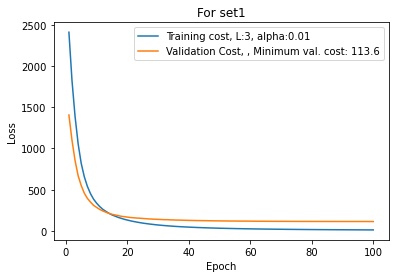

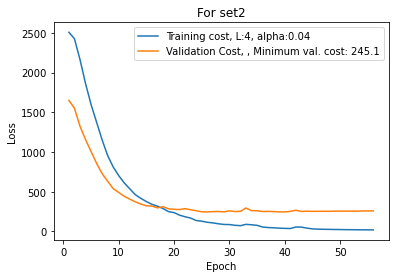

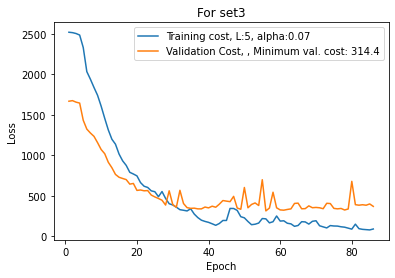

In [20]:
# Plot loss curves for the training and test sets on the same graph, 
# with a legend showing the different hyperparameter settings.

#plotting test error and training errors
plt.figure()
for key, value in sets.items():
    plt.plot(np.arange(1, len(value['train_cost_arr']) + 1, 1), value['train_cost_arr'], label = "Training cost, L:"+
             str(value['num_layers']) + ", alpha:"+str(value['alpha']))
    plt.plot(np.arange(1, len(value['test_cost_arr']) + 1, 1), value['test_cost_arr'], label = "Validation Cost, "+
             ", Minimum val. cost: "+str(np.round(value['min_val_loss'],1)))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('For '+key)
    plt.legend()
    plt.show()
    


### **Extra Experiment**

In [21]:
# For each set of parameters, give the best validation accuracy.

for key, value in sets.items():
    y_test_predicted = predict_y(value["W_best"], value["b_best"], X_test)
    y_correct = y_test_predicted == y_test_indices
    test_accuracy = np.sum(y_correct) / len(y_correct)
    print(f'For {key}')
    print('Best validation accuracy: %.4f' % (test_accuracy))
    print('\n')

For set1
Best validation accuracy: 0.9513


For set2
Best validation accuracy: 0.9166


For set3
Best validation accuracy: 0.9082




## PyTorch tutorial

Is there an easier way to build this type of model? One way is to learn a framework such as TensorFlow or PyTorch. Both of these frameworks have their
pros and cons, but PyTorch is probably the most productive neural network framework for research purposes. We'll use it here.

The material for this tutorial is from
[Anand Saha's PyTorch tutorial](https://github.com/anandsaha/deep.learning.with.pytorch).

### Tensors and Tensor operations

Let's get some hands on experience with tensor creation and operations.
The torch package contains the necessary data structures to create multidimensional tensors.
It also defines the mathematical operations that can be performed on these.

In [22]:
import torch

print('Torch version:', torch.__version__)
print('Torch+CUDA working:', torch.cuda.is_available())

Torch version: 1.4.0
Torch+CUDA working: True


#### Tensor creation

Let's create a (2$\times$3) (two-dimensional) tensor.

Note that a) you get back a FloatTensor, and  b) the values are uninitialized.

In [23]:
t = torch.Tensor(2, 3) #Tensor is class name, here instance of class Tensor is created with initial params (2,3)
print(t)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


The above call was equivalent to

In [24]:
t = torch.FloatTensor(2, 3)
print(t)

tensor([[2.3174e+07, 4.5724e-41, 2.3174e+07],
        [4.5724e-41, 4.4842e-44, 0.0000e+00]])


We can access an element, get an element's type, and get the shape of the tensor:

In [25]:
print('Elmement 0,0 of t:', t[0,0])
print('Type of element 0,0 of t:', type(t[0,0]))
print('Size of t:', t.size())
print('Number of dimensions in t:', t.dim())
print('A tensor\'s length is the number of dimensions it has?', len(t.size()) == t.dim())

Elmement 0,0 of t: tensor(23173728.)
Type of element 0,0 of t: <class 'torch.Tensor'>
Size of t: torch.Size([2, 3])
Number of dimensions in t: 2
A tensor's length is the number of dimensions it has? True


Let's set some of the elements of the the tensor to various values:

In [26]:
t[0][0] = 1
t[0][1] = 2
t[0][2] = 3
t[1][0] = 4
t[1][1] = 5
t[1][2] = 6
print(t)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


A `FloatTensor` can be cast to an `IntTensor`:

In [27]:
t = torch.FloatTensor([1.1, 2.2])
print('Float tensor:', t)
print('Int tensor:', t.type(torch.IntTensor))

Float tensor: tensor([1.1000, 2.2000])
Int tensor: tensor([1, 2], dtype=torch.int32)


Let's explore some other ways of creating a tensor.

In [28]:
# From another Tensor

t2 = torch.Tensor(t)
print('From a tensor:', t2)

# From a Python list

t3 = torch.IntTensor([[1, 2], [3, 4]])
print('From a Python list:', t3)

# From a NumPy array

import numpy as np
a = np.array([55, 66])
t4 = torch.Tensor(a)
print('From a NumPy array:', t4)

# A tensor with all zeros

t5 = torch.zeros(2, 3)
print('A tensor with all zeros:', t5)

# Create a tensor with all ones

t6 = torch.ones(2, 3)
print('A tensor with all ones:', t6)

# Create a tensor with all ones with dimensions 
# of another tensor

t7 = torch.ones_like(t4)
print('Another tensor of ones, with shape like another:', t7)

From a tensor: tensor([1.1000, 2.2000])
From a Python list: tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
From a NumPy array: tensor([55., 66.])
A tensor with all zeros: tensor([[0., 0., 0.],
        [0., 0., 0.]])
A tensor with all ones: tensor([[1., 1., 1.],
        [1., 1., 1.]])
Another tensor of ones, with shape like another: tensor([1., 1.])


#### Tensor operations

Let's experiment with operations on tensors. We can add tensors of the same shape:

In [29]:
t1 = torch.ones(2, 2)
t2 = torch.ones(2, 2)
t = t1 + t2
print(t)

tensor([[2., 2.],
        [2., 2.]])


Here are some examples of in-place and out-of-place operations.

In [30]:
t1.add(t2)

tensor([[2., 2.],
        [2., 2.]])

In [31]:
print(t1)

tensor([[1., 1.],
        [1., 1.]])


In [32]:
t1.add_(t2)

tensor([[2., 2.],
        [2., 2.]])

In [33]:
print(t1)

tensor([[2., 2.],
        [2., 2.]])


Many operations are implemented as both instance methods and as library/package functions:

In [34]:
t1.cos()

tensor([[-0.4161, -0.4161],
        [-0.4161, -0.4161]])

In [35]:
torch.cos(t1)

tensor([[-0.4161, -0.4161],
        [-0.4161, -0.4161]])

A few more operations

In [36]:
# Create a one-dimensional tensor of steps equally 
# spaced points between start and end

torch.linspace(3, 10, steps=5)

tensor([ 3.0000,  4.7500,  6.5000,  8.2500, 10.0000])

In [37]:
# Create a 1-D Tensor with values from [start, end)

torch.arange(0, 5)

tensor([0, 1, 2, 3, 4])

In [38]:
# Create a (2x3) Tensor with random values sampled 
# from uniform distrubution on the interval [0,1)

torch.rand((2,3))

tensor([[0.2317, 0.3986, 0.7182],
        [0.7724, 0.3536, 0.6292]])

In [39]:
# Create a (2x3) Tensor with random values sampled 
# from normal distrubution with 0 mean and variance 1

torch.randn((2,3))

tensor([[ 0.1065, -0.4529, -0.9784],
        [ 0.8062,  1.7304,  0.1380]])

In [40]:
# Do a matrix multiply

a = torch.rand((2, 3))
b = torch.rand((3, 2))

torch.mm(a, b)

tensor([[1.0521, 0.6041],
        [0.6154, 0.3611]])

#### Variables

Next, let's understand variables in PyTorch and the operations we can perform on them.

In [41]:
import torch
from torch.autograd import Variable

Let's create a small computation graph

In [42]:
x = Variable(torch.FloatTensor([11.2]), requires_grad=True)
y = 2 * x

In [43]:
print(x)
print(y)

tensor([11.2000], requires_grad=True)
tensor([22.4000], grad_fn=<MulBackward0>)


In [44]:
print(x.data)
print(y.data)

tensor([11.2000])
tensor([22.4000])


In [45]:
print(x.grad_fn)
print(y.grad_fn)

None


In [46]:
y.backward() # Calculates the gradients

In [47]:
print(x.grad)
print(y.grad)

tensor([2.])
None


### Working with PyTorch and NumPy

In [48]:
import torch
import numpy as np

Convert a NumPy array to Tensor

In [49]:
n = np.array([2, 3])
t = torch.from_numpy(n)
print(n)
print(t)

[2 3]
tensor([2, 3])


Change a Tensor value, and see the change in 
corresponding NumPy array

In [50]:
n[0] = 100
print(t)

tensor([100,   3])


Convert a Tensor to NumPy array

In [51]:
t = torch.FloatTensor([5, 6])
n = t.numpy()
print(t)
print(n)

tensor([5., 6.])
[5. 6.]


Change a Tensor value, and see the change in corresponding NumPy array

In [52]:
t[0] = 100
print(n)

[100.   6.]


### Tensors on GPU

Check if your machine has GPU support

In [53]:
if torch.cuda.is_available():
    print("GPU Supported")
else:
    print("GPU Not Supported")

GPU Supported


Check the number of GPUs attached to this machine

In [54]:
torch.cuda.device_count()

4

Get device name

In [55]:
torch.cuda.get_device_name(0)

'GeForce RTX 2080 Ti'

Moving a Tensor to GPU

In [56]:
t = torch.FloatTensor([2, 3])

In [57]:
print(t)

tensor([2., 3.])


In [58]:
t = t.cuda(0)

Creating a Tensor on GPU, directly

In [59]:
t = torch.cuda.FloatTensor([2, 3])
print(t)

tensor([2., 3.], device='cuda:0')


Bring it back to CPU

In [60]:
t = t.cpu()
print(t)

tensor([2., 3.])


Use device context

In [61]:
with torch.cuda.device(0):
    t = torch.cuda.FloatTensor([2, 3])
    print(t)

tensor([2., 3.], device='cuda:0')



## MNIST digit recognition using PyTorch

This part of the lab was
taken from the [Kaggle tutorial on MNIST with PyTorch]('https://www.kaggle.com/justuser/mnist-with-pytorch-fully-connected-network).

We will use a fully connected neural network and a batch learning algorithm and explain each
step along the way.

We need NumPy, PyTorch, some of PyTorch's modules, MatPlotLib, Seaborn for visualization, and pandas for
data import and transformations.

In [62]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Now we can import and transform the data. I decided to split it into input and labels right away at this step:

In [63]:
print("Reading the data...")
data = pd.read_csv('train_mnist.csv', sep=",")
test_data = pd.read_csv('test_mnist.csv', sep=",")

print("Reshaping the data...")
dataFinal = data.drop('label', axis=1)
labels = data['label']


dataNp = dataFinal.to_numpy()
labelsNp = labels.to_numpy()
test_dataNp = test_data.to_numpy()

print("Data is ready")

Reading the data...
Reshaping the data...
Data is ready


Now that data is ready, we can take a look at what we're dealing with. I will be using heatmaps from seaborn, which is an excellent tool for matrix visualization. But first, since the images in the MNIST dataset are represented as a long 1d arrays of pixels, we will need to reshape it into 2d array. That's where .reshape() from numpy comes in handy. The pictures are 28 x 28 pixels, so these will be the parameters.

Let's select a couple random samples and visualize them. I will also print their labels, so we can compare images with their actual value:

8  /  9
8  /  4
9  /  1


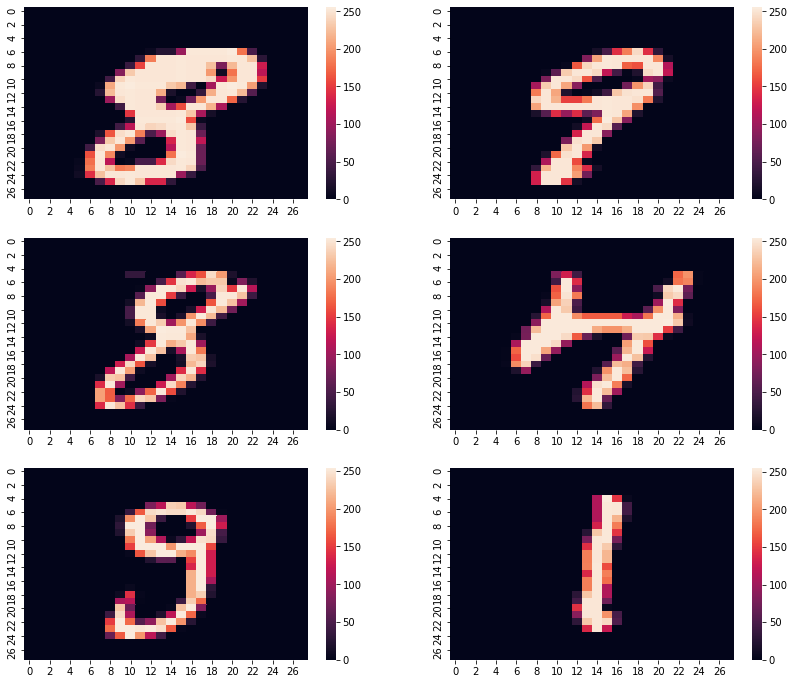

In [64]:
plt.figure(figsize=(14, 12))

pixels = dataNp[10].reshape(28, 28)
plt.subplot(321)
sns.heatmap(data=pixels)

pixels = dataNp[11].reshape(28, 28)
plt.subplot(322)
sns.heatmap(data=pixels)

pixels = dataNp[20].reshape(28, 28)
plt.subplot(323)
sns.heatmap(data=pixels)

pixels = dataNp[32].reshape(28, 28)
plt.subplot(324)
sns.heatmap(data=pixels)

pixels = dataNp[40].reshape(28, 28)
plt.subplot(325)
sns.heatmap(data=pixels)

pixels = dataNp[52].reshape(28, 28)
plt.subplot(326)
sns.heatmap(data=pixels)

print(labels[10], " / ", labels[11])
print(labels[20], " / ", labels[32])
print(labels[40], " / ", labels[52])

Since PyTorch uses tensors, we need to transform the input images
into tensors. The good news, as we saw earlier, is that PyTorch makes it very easy to move data from
NumPy arrays or regular Python lists to tensors. Here's how to do it for our data:

In [65]:
x = torch.FloatTensor(dataNp.tolist())
y = torch.LongTensor(labelsNp.tolist())

Before we start writing the actual network, we need to determine what will be the hyperparameters. Those will not be adjusted during training, so we need to be careful how we set them up. 

Here's what we will specify:
* **input_size** - size of the input layer, it is always fixed (784 pixels)
* **output_size** - size of the output layer, also fixed size (10 for every possible digit)
* **hidden_size** - size of the hidden layer, this parameter determines structure of the network. 200 worked for me, but it is worth to play with this parameter to see what works for you
* **epochs** - how many times will the network go through the entire dataset during training. 
* **learning_rate** - determines how fast will the network learn. You should be very careful about this parameter, because if it is too high, the network won't learn at all, if it is too low, the net will learn too long. I's always about balance. Usualy 10^-3 - 10^-5 works just fine.
* **batch_size** - size of mini batches during training

In [66]:
# hyperparameters
input_size = 784
output_size = 10
hidden_size = 200

epochs = 20
batch_size = 50
learning_rate = 0.00005

Now we can finally write a Python class for the actual network.
Our `Network` class will be a subclass of PyTorch's neural network
`Module` class.

When writing a PyTorch neural network class, a few things must always be there:
* `__init__(self)`: initializes the the new `Network` instance. Here we set up instance fields
  representing the parameters of the network as well as any other needed initialization.
* `forward(self, x)`: defines how an input is propagated forward through the various layers
  and transformations in the network. The forward function normally makes use of the instance
  fields set up in the initialization stage.

In the initialization, first of all, we need to initialize the superclass's fields then
create needed layers with parameters. You can experiment with this (put more layers or change hidden layer size, etc.), but the give structure will work fine.

In forward propagation, we simply reassign the value of `x` as it flows through the layers
and return the softmax of the last linear layer's values at the end.

In [67]:
class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l3 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l3(x)
        return F.log_softmax(x) 

After we've defined the network, we can initialize it. 
Also, if we "print" the instance of the net, we can see the structure of it in a neat format:

In [68]:
net = Network()
print(net)

Network(
  (l1): Linear(in_features=784, out_features=200, bias=True)
  (relu): ReLU()
  (l3): Linear(in_features=200, out_features=10, bias=True)
)


Now it's time to set up the [optimizer](http://pytorch.org/docs/master/optim.html) and a loss function. 

*There are quite a lot of things happening behind these two lines of code, so if you don't know what is going on here, don't worry too much for now, it will get clearer eventualy.* 

Optimizer is what  updates the parameters of the network. We'll use the most basic method, stochastic gradient descent with momentum. Also, the optimizer takes the network parameters as an argument, but it's not a big deal since we can get those with a `parameters()` method call on the network instance.

As is standard for a multinomial output distribution, we use [cross entropy loss](https://en.wikipedia.org/wiki/Cross_entropy).

In [69]:
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
loss_func = nn.CrossEntropyLoss()

Now that everything is ready, our network can start learning. I will separate data into minibatches and feed it to the network. It has many advantages over single batch learning, but that is a different story. 

Also, I will use loss_log list to keep track of the loss function during the training process. 

In [70]:
loss_log = []

for e in range(epochs):
    for i in range(0, x.shape[0], batch_size):
        x_mini = x[i:i + batch_size] 
        y_mini = y[i:i + batch_size] 
        
        x_var = Variable(x_mini)
        y_var = Variable(y_mini)
        
        optimizer.zero_grad()
        net_out = net(x_var)
#         print(y_var.shape)
        
        loss = loss_func(net_out, y_var)
        loss.backward()
        optimizer.step()
        
        if i % 100 == 0:
            loss_log.append(loss.item())
        
    print('Epoch: {} - Loss: {:.6f}'.format(e, loss.item()))

Epoch: 0 - Loss: 0.130152
Epoch: 1 - Loss: 0.127982
Epoch: 2 - Loss: 0.095208
Epoch: 3 - Loss: 0.078272
Epoch: 4 - Loss: 0.061421
Epoch: 5 - Loss: 0.043342
Epoch: 6 - Loss: 0.033597
Epoch: 7 - Loss: 0.024038
Epoch: 8 - Loss: 0.018440
Epoch: 9 - Loss: 0.013337
Epoch: 10 - Loss: 0.010597
Epoch: 11 - Loss: 0.008118
Epoch: 12 - Loss: 0.006744
Epoch: 13 - Loss: 0.005354
Epoch: 14 - Loss: 0.004412
Epoch: 15 - Loss: 0.004388
Epoch: 16 - Loss: 0.003580
Epoch: 17 - Loss: 0.003395
Epoch: 18 - Loss: 0.003167
Epoch: 19 - Loss: 0.003022


So, let's go line by line and see what is happening here:

This is the main loop that goes through all the epochs of training. An epoch is one full training on the full dataset.

    for e in range(epochs):
This is the inner loop that simply goes through the dataset batch by batch:

    for i in range(0, x.shape[0], batch_size):
Here is where we get the batches out of our data and simply assign them to variables for further work:

    x_mini = x[i:i + batch_size] 
    y_mini = y[i:i + batch_size] 
   These two lines are quite *important*. Remember I told you about tensors and how PyTorch stores data in them? That's not the end of story. Actually, to allow the network to work with data, we need a wrapper for those tensors called Variable. It has some additional properties, like allowing automatic gradient computation when backpropagating. It is required for the proper work of PyTorch, so we will add them here and supply tensors as parameters:
   
    x_var = Variable(x_mini)
    y_var = Variable(y_mini)
This line just resets the gradient of the optimizer:
    
    optimizer.zero_grad()
Remember the *forward(self, x)* function that we previously defined? The next line is basically calling this function and does the forward propagation:

    net_out = net(x_var)
This line computes the loss function based on predictions of the net and the correct answers:

    loss = loss_func(net_out, y_var)
Here we compute the gradient based on the loss that we've got. It will be used to adjust parameters of the network.

    loss.backward()
And here is where we finally update our network with new adjusted parameters:

    optimizer.step()
The rest is just logging, which might be helpful to observe how well the network is performing.

After the network is done with training, we can take a look at the loss function, and how it behaved during training:

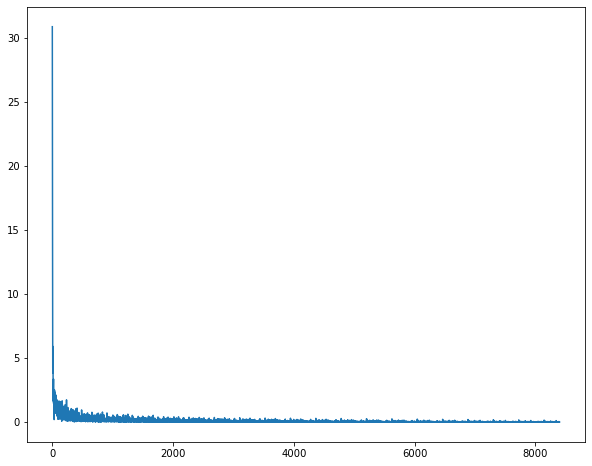

In [71]:
plt.figure(figsize=(10,8))
plt.plot(loss_log)

At this point, the network should be trained, and we can make a prediction using the test dataset. All we need to do is wrap the data into the Variable and feed it to the trained net, so nothing new here.

In [72]:
test = torch.FloatTensor(test_dataNp.tolist())
test_var = Variable(test)

net_out = net(test_var)

print(torch.max(net_out.data, 1)[1].numpy())

[2 0 9 ... 3 9 2]


In [73]:
torch.max(net_out.data,1)

torch.return_types.max(
values=tensor([ 0.0000e+00,  0.0000e+00, -2.1665e-03,  ...,  0.0000e+00,
        -1.2794e-03, -8.9407e-06]),
indices=tensor([2, 0, 9,  ..., 3, 9, 2]))

Now we have out predictions that are ready to be submitted. Before that, we can take a look at predictions and compare them to the actual pictures of digits, just like at the start with training data:

Prediction: 0 / 5
Prediction: 9 / 7
Prediction: 0 / 8


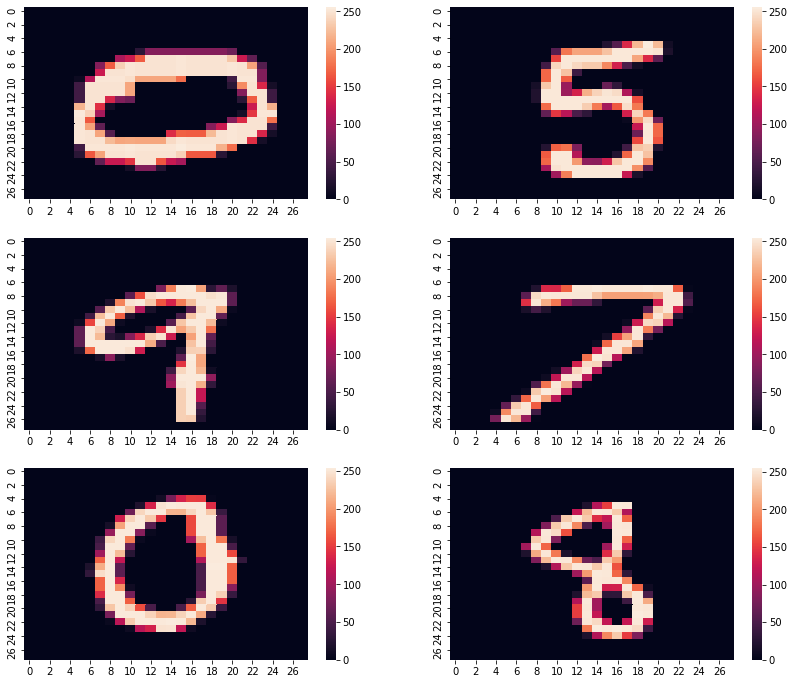

In [74]:
plt.figure(figsize=(14, 12))

pixels = test_dataNp[1].reshape(28, 28)
plt.subplot(321)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[1].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[10].reshape(28, 28)
plt.subplot(322)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[10].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[20].reshape(28, 28)
plt.subplot(323)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[20].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[30].reshape(28, 28)
plt.subplot(324)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[30].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[100].reshape(28, 28)
plt.subplot(325)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[100].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[2000].reshape(28, 28)
plt.subplot(326)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[1].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)


print("Prediction: {} / {}".format(torch.max(net_out.data, 1)[1].numpy()[1], torch.max(net_out.data, 1)[1].numpy()[10]))
print("Prediction: {} / {}".format(torch.max(net_out.data, 1)[1].numpy()[20], torch.max(net_out.data, 1)[1].numpy()[30]))
print("Prediction: {} / {}".format(torch.max(net_out.data, 1)[1].numpy()[100], torch.max(net_out.data, 1)[1].numpy()[2000]))

In [75]:
output = (torch.max(net_out.data, 1)[1]).numpy()
#np.savetxt("out.csv", np.dstack((np.arange(1, output.size+1),output))[0],"%d,%d",header="ImageId,Label")

And that is about it, we've made a simple neural network using PyTorch that can recognize handwritten digits. Not so bad!

When I was writing this notebook, this model scorred 96.6%, which is not perfect by any means, but it's not that bad either. 

I hope this was useful for some of you. If you are totally new to deep learning, I suggest you learn how the neural networks actually work from the inside, especially the backpropagation algorithm.

These videos explain [neural nets](https://www.youtube.com/watch?v=aircAruvnKk&t=708s) and [backpropagation](https://www.youtube.com/watch?v=Ilg3gGewQ5U) quite well.

Also I suggest you to take a look at this [online book](http://neuralnetworksanddeeplearning.com/chap1.html) (it's absolutely free, btw), where neural networks are explained in great detail, and it even has an implementation of the MNIST problem from scratch, using only numpy.

If you have any feedback, feel free to leave comments down below, and good luck with your deep learning adventures :)

## Take-home exercise (50 points)

Make sure you can run the PyTorch examples of MNIST classification, then apply the PyTorch example to another
classification problem you've worked with this semester, the breast cancer dataset. Get familiar with
working with models in PyTorch, get the best result you can on the breast cancer dataset, then 
report your experiments and results in your brief lab report.

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("breast_cancer.csv")
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [77]:
X = data.drop(columns=['id','Unnamed: 32','diagnosis'])
y = data['diagnosis']
y, unique_y = pd.factorize(y)
X_columns = X.columns

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)

scaler = StandardScaler() 
scaler.fit(X_train) #Compute the mean and std to be used for later scaling

X_train = scaler.transform(X_train) #Perform standardization by centering and scaling, mean=0, variance=1
X_test = scaler.transform(X_test)

X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

In [78]:
print(X_train_tensor.shape)
print(len(unique_y))

torch.Size([455, 30])
2


In [79]:
# Your code here

input_size = X_train_tensor.shape[1]
output_size = 2
hidden1_size = 20
hidden2_size = 10
# hidden3_size = None
# hidden4_size = None

epochs = 200
batch_size = 10
learning_rate = 0.001

In [80]:
class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        # YOUR CODE HERE
        self.l1 = nn.Linear(input_size, hidden1_size)
        self.l2 = nn.Linear(hidden1_size, hidden2_size)
        self.l3 = nn.Linear(hidden2_size, output_size)
        self.non_linear = nn.Sigmoid()
        self.softmax = nn.Softmax()
        
    def forward(self, x):
        # YOUR CODE HERE
        x = self.l1(x)
        x = self.non_linear(x)
        x = self.l2(x)
        x = self.non_linear(x)
        x = self.l3(x)
        return self.softmax(x)

In [81]:
# Continue yourself
net = Network()
print(net)

Network(
  (l1): Linear(in_features=30, out_features=20, bias=True)
  (l2): Linear(in_features=20, out_features=10, bias=True)
  (l3): Linear(in_features=10, out_features=2, bias=True)
  (non_linear): Sigmoid()
  (softmax): Softmax(dim=None)
)


In [82]:
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
loss_func = nn.CrossEntropyLoss()

In [83]:
# print(y_train_tensor)
print(X_train_tensor.shape)

torch.Size([455, 30])


In [84]:
loss_log = []

for e in range(epochs):
    for i in range(0, X_train_tensor.shape[0], batch_size):
        x_batch = X_train_tensor[i:i + batch_size]
        y_batch = y_train_tensor[i:i + batch_size]
        
        x_var = Variable(x_batch)
        y_var = Variable(y_batch)
        
        optimizer.zero_grad()
        net_out = net(x_var)
        
        loss = loss_func(net_out, y_var)
        loss.backward()
        optimizer.step()
        
        if i%50 == 0:
            loss_log.append(loss.item())
    print(f'Epoch: {e} - Loss {np.round(loss.item(), 6)}')

Epoch: 0 - Loss 0.657417
Epoch: 1 - Loss 0.636132
Epoch: 2 - Loss 0.620998
Epoch: 3 - Loss 0.610001
Epoch: 4 - Loss 0.601791
Epoch: 5 - Loss 0.595503
Epoch: 6 - Loss 0.590579
Epoch: 7 - Loss 0.586651
Epoch: 8 - Loss 0.583465
Epoch: 9 - Loss 0.580845
Epoch: 10 - Loss 0.578667
Epoch: 11 - Loss 0.576838
Epoch: 12 - Loss 0.575289
Epoch: 13 - Loss 0.573967
Epoch: 14 - Loss 0.572832
Epoch: 15 - Loss 0.571852
Epoch: 16 - Loss 0.571002
Epoch: 17 - Loss 0.570261
Epoch: 18 - Loss 0.569612
Epoch: 19 - Loss 0.569042
Epoch: 20 - Loss 0.56854
Epoch: 21 - Loss 0.568096
Epoch: 22 - Loss 0.567702
Epoch: 23 - Loss 0.567351
Epoch: 24 - Loss 0.567038
Epoch: 25 - Loss 0.566758
Epoch: 26 - Loss 0.566506
Epoch: 27 - Loss 0.566278
Epoch: 28 - Loss 0.566072
Epoch: 29 - Loss 0.565884
Epoch: 30 - Loss 0.565713
Epoch: 31 - Loss 0.565556
Epoch: 32 - Loss 0.56541
Epoch: 33 - Loss 0.565275
Epoch: 34 - Loss 0.565149
Epoch: 35 - Loss 0.565031
Epoch: 36 - Loss 0.564918
Epoch: 37 - Loss 0.564811
Epoch: 38 - Loss 0.56470

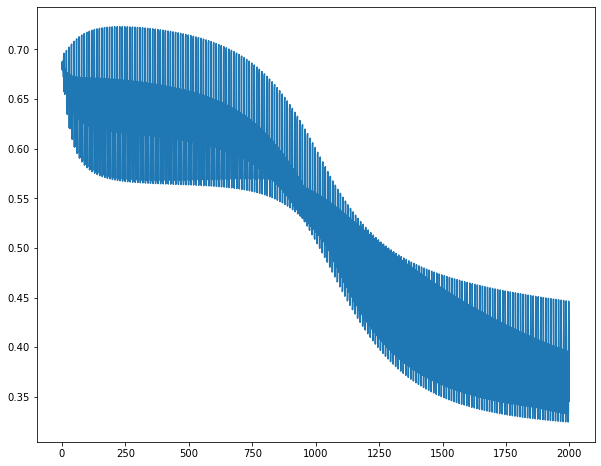

In [85]:
plt.figure(figsize=(10,8))
plt.plot(loss_log)

In [86]:
test_var = Variable(X_test_tensor)

net_out = net(test_var)

predicted_y = torch.max(net_out.data, 1)[1].numpy()

In [87]:
accuracy = (y_test == predicted_y).sum()/len(y_test)
print(f"Accuracy percentage: {np.round(accuracy*100,2)}%")

Accuracy percentage: 98.25%


In [88]:
print("Total number of incorrect prediction: ",np.invert(y_test == predicted_y).sum())

Total number of incorrect prediction:  2


Report your experiments and results in your brief lab report.

### Experiments:

The training data size is 455 and total feature size is 30. Since the training data size is small, I chose to have two hidden layers of size 20 and 10 respectively. The total number of learning weights of this model is 30x20x10x2 = 12000 which is pretty okay (in my view) for 455x30 = 13650 total different values. I initially chose learning rate of 0.0001, which causes our model to converge very slowly. So, I increase the learning rate to 0.001. Initially, I set total epochs to 100 but the model didn't seem to reach flat state as seen from its learning curve. Hence, I doubled the epochs value. The training curve is as shown in above figure. For batch size, I set it to be 10.

For the non-linearity, I used Sigmoid function for both the hidden layers, and for output layer, I used Softmax function. For activation function, I used Stochastic Gradient Descent function, and Cross Entropy as a loss function.


### Results (At the time of report writing):

The accuracy of our model on test datasets is 99.12% (98.25% - next run) which is pretty high. Our model failed to predict for only 1 (2 example- next run) example.

### Practice

In [89]:
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(2)
output = loss(input, target)
output.backward()

In [90]:
print(input)
print(target)

tensor([[-0.2708, -0.4492, -1.5448, -0.1159,  0.5776],
        [-0.2660,  1.2125, -1.6241, -1.4376, -0.2642],
        [-0.1554, -1.9487,  0.9303,  1.3898,  0.3921]], requires_grad=True)
tensor([0, 1, 0])


### Note for CrossEntropy loss calculation

In [91]:
i = torch.FloatTensor([[1,2,3], [2,5,4]]) #Two dimension (batch_size, output_size), here shape is (2,3), output from the model
t = torch.LongTensor([1,2]) #target output should be torch.long datatype, len = batch_size (here, batch_size = 2)
loss(i,t)

tensor(1.3783)

In [92]:
i.shape

torch.Size([2, 3])

In [93]:
# loss = nn.CrossEntropyLoss()
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.randn(3, 5).softmax(dim=1)
# loss(input, target)


In [94]:
# i = torch.FloatTensor([[0.1,0.2,0.7]]) 
# t = torch.FloatTensor([[0,0,1]]) 
# loss(i,t)